In [159]:
#set dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
import matplotlib.ticker as ticker
import requests
import json
import seaborn as sns
from api_keys import geoapify_key

In [160]:
# load aviation data
aviation_data = pd.read_csv("./dataset/airline_data.csv")
aviation_data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [161]:
flights = aviation_data.to_dict(orient='records')

filtered_flights = []

for flight in flights:
    flight_date = str(flight["month"])
    if flight_date.startswith("11") or flight_date.startswith("12"):
        filtered_flights.append(flight)
        
print(len(filtered_flights))

11445


In [162]:
formatted_flights = []

np.random.seed(1234)

random_flights = random.sample(filtered_flights, min(200, len(filtered_flights)))

print(f"Number of randomly selected flights: {len(random_flights)}")

Number of randomly selected flights: 200


In [163]:
for flight in random_flights:
    airline_name = flight["carrier_name"]
    arrival_airport = flight["airport"]
    month = flight["month"]
    year = flight["year"]
    airline_delay = flight["carrier_delay"]
    weather_delay = flight["weather_delay"]
    nas_delay = flight["nas_delay"]
    security_delay = flight["security_delay"]
    late_aircraft_delay = flight["late_aircraft_delay"]
    count_airline_delay = flight["carrier_ct"]
    count_weather_delay = flight["weather_ct"]
    count_nas_delay = flight["nas_ct"]
    count_security_delay = flight["security_ct"]
    count_late_aircraft_delay = flight["late_aircraft_ct"]

    # NAS is the National Aviation System
    formatted_flights.append({
        "Year": year,
        "Month": month,
        "Airline Name": airline_name,
        "Arrival Airport": arrival_airport,
        "Delay due to Airline in Mins": airline_delay,
        "Delay due to Weather in Mins": weather_delay,
        "Delay due to NAS in Mins": nas_delay,
        "Delay due to Security in Mins": security_delay,
        "Delay due to Late Aircraft in Mins": late_aircraft_delay,
        "# of Airline Delays": count_airline_delay,
        "# of Weather Delays": count_weather_delay,
        "# of NAS Delays": count_nas_delay,
        "# of Security Delays": count_security_delay,
        "# of Late Aircraft Delays": count_late_aircraft_delay
    })

In [169]:
flight_data_df = pd.DataFrame(formatted_flights)

flight_data_df.head()

,Year,Month,Airline Name,Arrival Airport,Delay due to Airline in Mins,Delay due to Weather in Mins,Delay due to NAS in Mins,Delay due to Security in Mins,Delay due to Late Aircraft in Mins,# of Airline Delays,# of Weather Delays,# of NAS Delays,# of Security Delays,# of Late Aircraft Delays
0,2023,12,Southwest Airlines,BWI,13084.0,279.0,7156.0,247.0,27196.0,331.47,5.36,247.99,9.25,552.94
1,2022,11,Delta Air Lines Network,OGG,59.0,188.0,248.0,0.0,141.0,1.81,1.76,6.79,0.00,4.64
2,2022,11,Air Wisconsin Airlines Corp,DLH,267.0,131.0,169.0,0.0,406.0,7.00,1.00,4.03,0.00,1.96
3,2021,11,"Commutair Aka Champlain Enterprises, Inc.",PHL,114.0,0.0,132.0,0.0,0.0,4.72,0.00,5.28,0.00,0.00
4,2022,11,American Airlines Network,IAH,1903.0,241.0,1245.0,25.0,3024.0,34.47,2.75,31.47,1.00,38.31


In [170]:
flight_data_df.to_csv("flights.csv", index=True, mode='w')

flight_data_df = pd.read_csv("flights.csv", index_col=0)

flight_data_df.head()

,Year,Month,Airline Name,Arrival Airport,Delay due to Airline in Mins,Delay due to Weather in Mins,Delay due to NAS in Mins,Delay due to Security in Mins,Delay due to Late Aircraft in Mins,# of Airline Delays,# of Weather Delays,# of NAS Delays,# of Security Delays,# of Late Aircraft Delays
0,2023,12,Southwest Airlines,BWI,13084.0,279.0,7156.0,247.0,27196.0,331.47,5.36,247.99,9.25,552.94
1,2022,11,Delta Air Lines Network,OGG,59.0,188.0,248.0,0.0,141.0,1.81,1.76,6.79,0.00,4.64
2,2022,11,Air Wisconsin Airlines Corp,DLH,267.0,131.0,169.0,0.0,406.0,7.00,1.00,4.03,0.00,1.96
3,2021,11,"Commutair Aka Champlain Enterprises, Inc.",PHL,114.0,0.0,132.0,0.0,0.0,4.72,0.00,5.28,0.00,0.00
4,2022,11,American Airlines Network,IAH,1903.0,241.0,1245.0,25.0,3024.0,34.47,2.75,31.47,1.00,38.31


## Top Five Airlines with the Most Delays due to Airline Carrier (Swayansiddha)

### Air Carrier Delays happen due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.) 

In [171]:
# find the max delay by airline
max_delay_by_airline = flight_data_df.groupby(['Airline Name'])['# of Airline Delays'].max()
max_delay_by_airline 

Airline Name
Air Wisconsin Airlines Corp                  103.45
Alaska Airlines Network                       22.37
Allegiant Air                                 11.85
American Airlines Network                    657.72
Commutair Aka Champlain Enterprises, Inc.     11.72
CommuteAir LLC dba CommuteAir                  5.77
Delta Air Lines Network                       88.17
Endeavor Air Inc.                             49.06
Envoy Air                                     11.06
Frontier Airlines                             80.76
GoJet Airlines LLC d/b/a United Express        2.05
Hawaiian Airlines Network                    117.06
Horizon Air                                   21.03
JetBlue Airways                               64.66
Mesa Airlines Inc.                            17.33
PSA Airlines Inc.                             13.88
Piedmont Airlines                              4.66
Republic Airline                              13.57
SkyWest Airlines Inc.                        132.00

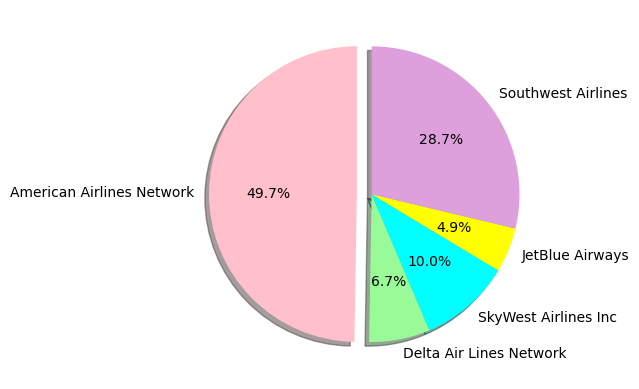

In [175]:
# This pie chart shows the top 5 # Air Line delays by Airline Name 
#so we can easily get 5  top most delayed Airlines name.
labels = ['American Airlines Network', 'Delta Air Lines Network', 'SkyWest Airlines Inc', 'JetBlue Airways', 'Southwest Airlines']
sizes = [657.72, 88.17, 132, 64.66, 379.97]
colors = ['pink', 'palegreen', 'cyan', 'yellow', 'plum']
explode = (0.1, 0, 0, 0, 0)
plt.pie(sizes, labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

## Average Delays due to Airline Carrier (Swayansiddha)

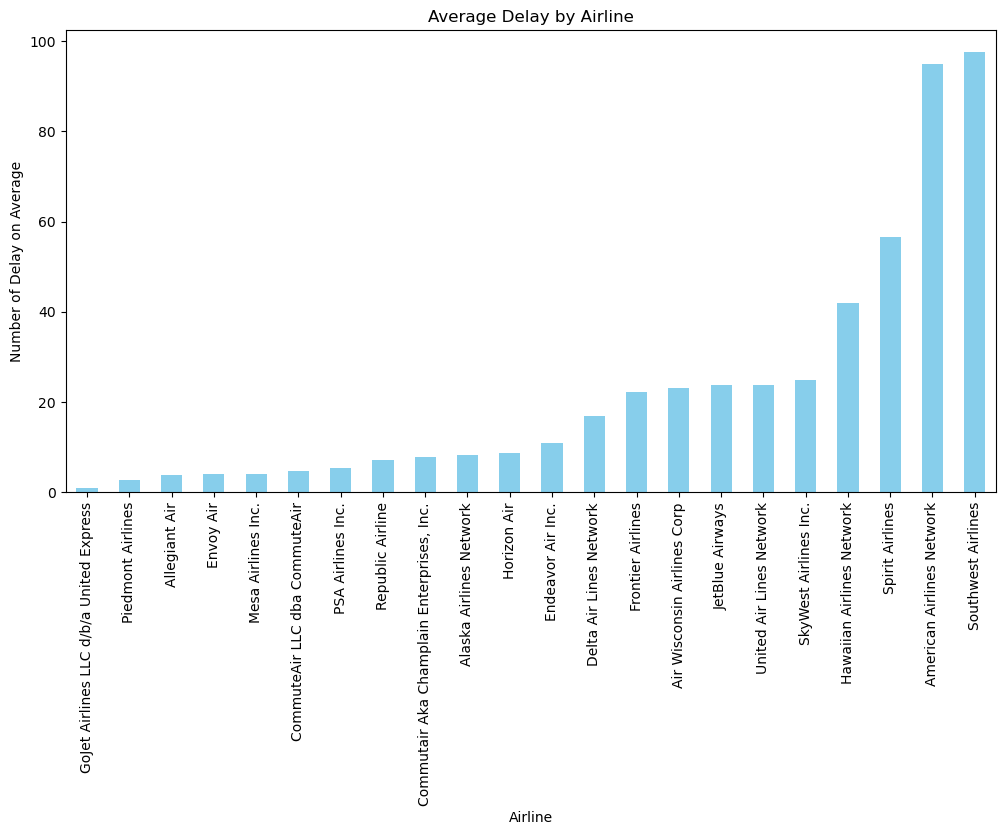

In [176]:
#Average Delay by Airline. A bar chart showing the average delay time for each airline can reveal if certain airlines tend to have longer or shorter delays.
avg_delay_by_airline = flight_data_df.groupby('Airline Name')['# of Airline Delays'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_delay_by_airline.plot(kind='bar', color='skyblue')
plt.title("Average Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Delay on Average")
plt.show()

## Weather Related Delays in Hours, By Airline and Months During the Holiday Season (Nov & Dec 2021-2023) (Hannah)

### Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.

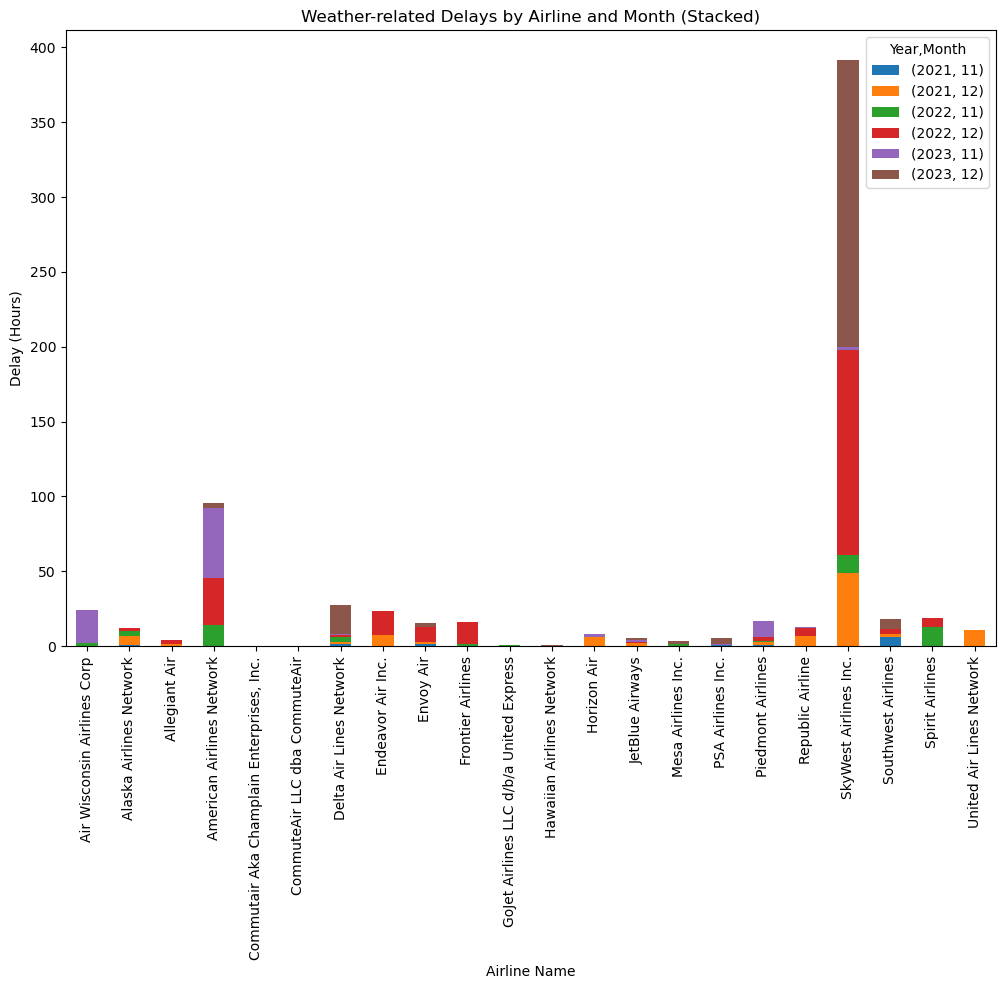

In [177]:
# Group by 'Airline Name', 'Month', and 'Year' and sum delay due to weather
aggregated_data = flight_data_df.groupby(["Airline Name", "Month", "Year"]).sum({"Delay due to Weather in Mins": "sum"})
     
# Put aggregated data into a dataframe
pivoted_data = aggregated_data.pivot_table(index=["Airline Name"], columns=["Year", "Month"], values="Delay due to Weather in Mins", aggfunc="sum")
pivoted_data = pivoted_data.fillna("0.0")   
# Display the pivoted DataFrame
#print(pivoted_data)

# Convert Delay from minutes to hours
pivoted_data = pivoted_data.apply(pd.to_numeric, errors='coerce')
pivoted_data = pivoted_data / 60
#print(pivoted_data)

pivoted_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Weather-related Delays by Airline and Month (Stacked)')
plt.xlabel('Airline Name')
plt.ylabel('Delay (Hours)')
plt.show()


## Relationship between Flight Cancellation and Weather Delays in the Month of Dec. 2023 (Hannah)

Pearson correlation between weather delays and flight cancellations: 0.36


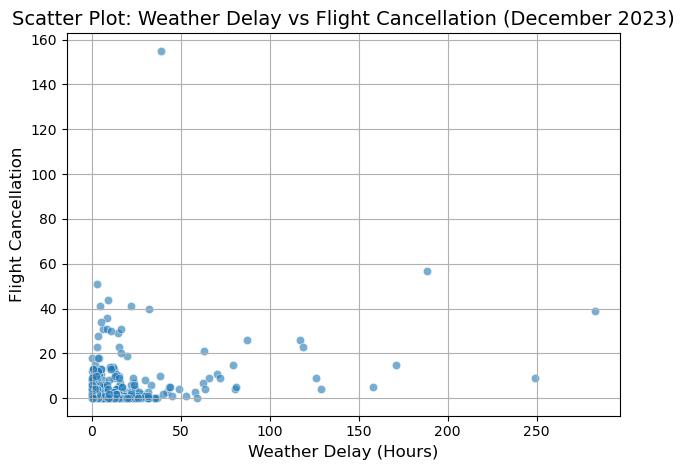

In [178]:
aviation_data = pd.read_csv("./dataset/airline_data.csv")

december_2023_data = aviation_data[
    (aviation_data['month'] == 12) & 
    (aviation_data['year'] == 2023)
]

# Clean and filter data to avoid NaN values for correlation calculation
december_2023_data = december_2023_data[['weather_delay', 'arr_cancelled']].dropna()
december_2023_data["weather_delays_hours"] = december_2023_data["weather_delay"]/60

# Calculate the correlation between weather delays and cancellation status
correlation = december_2023_data['weather_delay'].corr(december_2023_data['arr_cancelled'])

# Print the Pearson correlation coefficient
print(f"Pearson correlation between weather delays and flight cancellations: {correlation:.2f}")

sns.scatterplot(x='weather_delays_hours', y='arr_cancelled', data=december_2023_data, alpha=0.6)

# Customize the plot
plt.title('Scatter Plot: Weather Delay vs Flight Cancellation (December 2023)', fontsize=14)
plt.xlabel('Weather Delay (Hours)', fontsize=12)
plt.ylabel('Flight Cancellation', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

## Number of Delays due to Late Aircrafts during the Holidays (Nov & Dec 2021-2023) (Andrey)

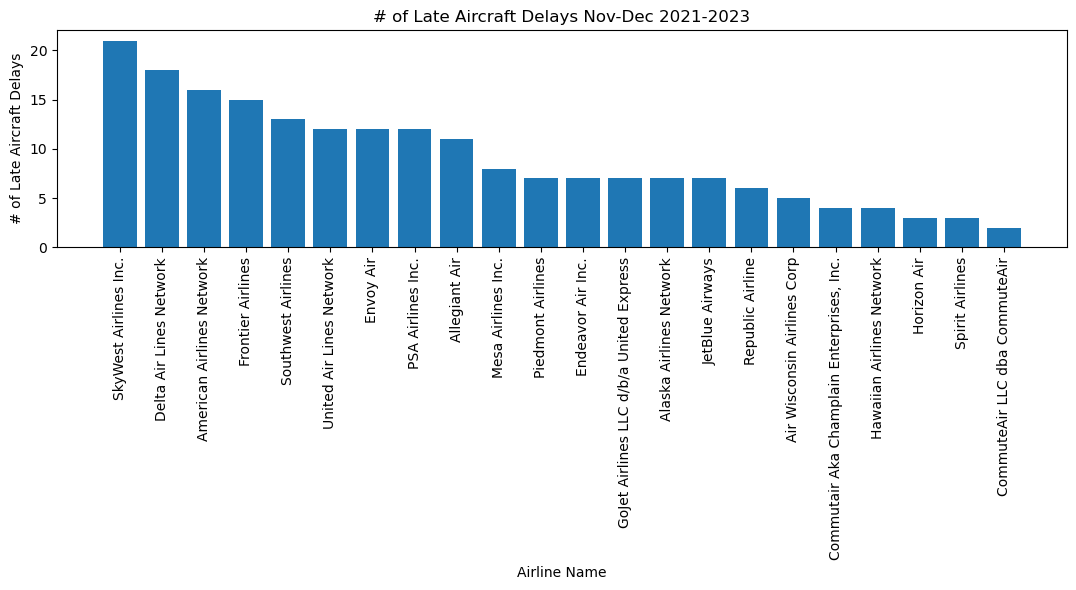

In [179]:
# Load your dataset
#flights = out_df
#df = pd.read_csv('./dataset/flights.csv')
#flights = pd.DataFrame(df)
# Group by airline and calculate average delay
#airline_delays = flights.groupby('Airline Name')['Delay due to Weather in Mins'].mean().reset_index()
airline_delays = flight_data_df.groupby('Airline Name')['# of Late Aircraft Delays'].count().reset_index()

# Sort by average delay
airline_delays = airline_delays.sort_values(by='# of Late Aircraft Delays', ascending=False)

# Create the bar plot
plt.figure(figsize=(11, 6))
plt.bar(airline_delays['Airline Name'], airline_delays['# of Late Aircraft Delays'])
plt.xlabel('Airline Name')
plt.ylabel('# of Late Aircraft Delays')
plt.title('# of Late Aircraft Delays Nov-Dec 2021-2023')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Daniela will tell us a little bit about the NAS.

## The Average Number of Delays due to the National Aviation System for the Top Three Airlines in the USA (Daniela)

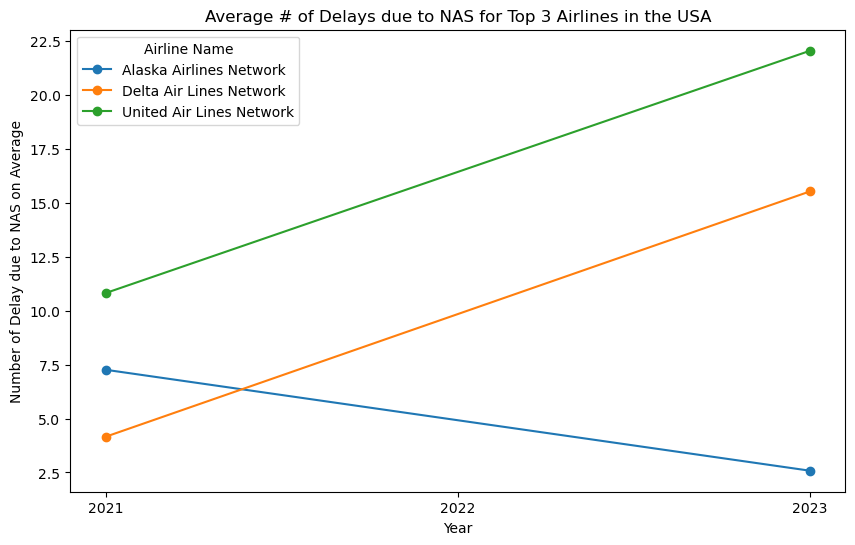

In [180]:
#load your dataset
flights = flight_data_df

# Filter the DataFrame for the top 3 airlines
top_airlines = ['United Air Lines Network', 'Alaska Airlines Network', 'Delta Air Lines Network']
filtered_flights = flights[(flights['Airline Name'].isin(top_airlines) & (flights["Year"]))]
#print(filtered_flights)


# Now group by 'Airline Name' and calculate the mean of '# of NAS Delays'
avg_delay_by_top3airlines = filtered_flights.groupby(['Year', 'Airline Name'])['# of NAS Delays'].mean().reset_index()
#print(avg_delay_by_top3airlines)

avg_delay_by_top3airlines.pivot(index='Year', columns='Airline Name', values='# of NAS Delays').plot(kind='line', marker='o', figsize=(10, 6))
#plt.figure(figsize=(12, 6))
plt.title("Average # of Delays due to NAS for Top 3 Airlines in the USA")
plt.xlabel("Year")
plt.ylabel("Number of Delay due to NAS on Average")
plt.xticks(ticks=[2021, 2022, 2023], labels=[2021, 2022, 2023])
plt.show()

## Which Airports along the East Coast have the most delays or least delays? (# of Delayed Flights (all delay causes) vs. East Coast Airports

In [181]:
# create a list with all iata codes for east coast airports
east_coast_iata_codes = ["ATL", "BOS", "BWI", "CLT", "DCA", "EWR", "FLL", "IAD", "JFK", "LGA", "MCO", "MIA", "PHL", "PVD", "RDU", "RIC", "TPA", "ORF", "JAX", "SAV"]

# look through our dataset and pull out any arrival airports that are on the east coast airports list
east_coast_airports = flight_data_df[flight_data_df["Arrival Airport"].isin(east_coast_iata_codes)]

#east_coast_airports

In [182]:
#create a new data frame with the delays that occured at these east coast airports
east_coast_airports_delays_df = east_coast_airports[["Arrival Airport", "# of Airline Delays", "# of Weather Delays", "# of NAS Delays", "# of Security Delays", "# of Late Aircraft Delays"]]

#east_coast_airports_delays_df.head()

In [183]:
# create a new column for total delays, adding up all the types of delays that occured
east_coast_airports_delays_df.loc[:, "Total Delays"] = (
    east_coast_airports_delays_df["# of Airline Delays"] +
    east_coast_airports_delays_df["# of Weather Delays"] +
    east_coast_airports_delays_df["# of NAS Delays"] +
    east_coast_airports_delays_df["# of Security Delays"] +
    east_coast_airports_delays_df["# of Late Aircraft Delays"]
)

#east_coast_airports_delays_df

/var/folders/qq/9mv9m38n06b8vj0fzt8fpjtc0000gn/T/ipykernel_58028/2805934890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_coast_airports_delays_df.loc[:, "Total Delays"] = (


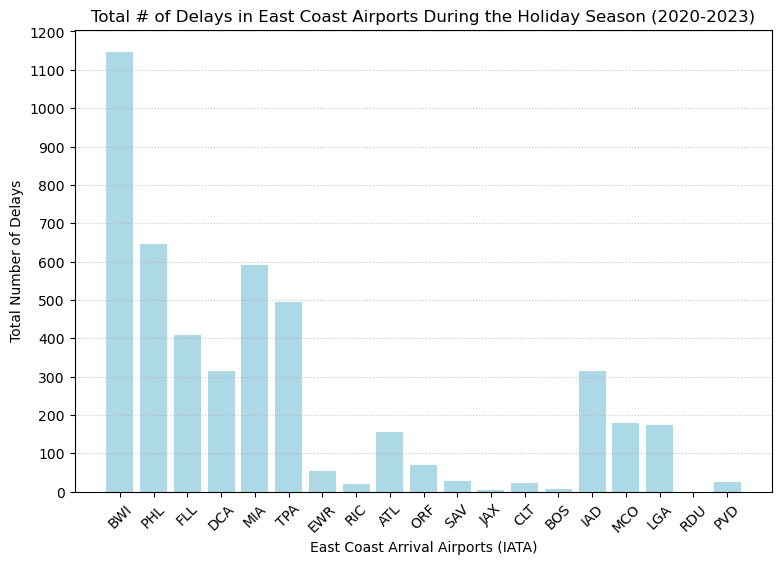

In [184]:
# plot the data showing total delays for east coast airports

plt.figure(figsize=(9,6))
plt.bar(east_coast_airports_delays_df["Arrival Airport"], east_coast_airports_delays_df["Total Delays"], color='lightblue', align="center")
plt.xticks(rotation=45)
plt.title("Total # of Delays in East Coast Airports During the Holiday Season (2020-2023)")
plt.xlabel("East Coast Arrival Airports (IATA)")
plt.ylabel("Total Number of Delays")
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.grid(axis="y", linestyle=":", alpha=0.7)
plt.show()

## Airports Along the East Coast vs the Amount of Total Delays (all delay causes) During the Holiday Season Using an API to Create a Map Plot

In [185]:
# use the GeoApify API to gather Coordinates for all East Coast Airports

# list east coast airport iata codes
airport_info = {
    "Newark Liberty International Airport": "EWR",
    "Baltimore/Washington International Thurgood Marshall Airport": "BWI",
    "Fort Lauderdale-Hollywood International Airport": "FLL", 
    "Boston Logan International Airport": "BOS",
    "Norfolk International Airport": "ORF",
    "T.F. Green Airport": "PVD",
    "Richmond International Airport": "RIC",
    "LaGuardia Airport": "LGA",
    "Ronald Reagan Washington National Airport": "DCA",
    "Raleigh-Durham International Airport": "RDU",
    "Philadelphia International Airport": "PHL",
    "Miami International Airport": "MIA",
    "Jacksonville International Airport": "JAX",
    "Charlotte Douglas International Airport": "CLT",
    "Tampa International Airport": "TPA"
}

airport_info_list = list(airport_info.values())

base_url = url = "https://api.geoapify.com/v1/geocode/search"

# create lists for the coordinates
latitudes = []
longitudes = []

# loop through the airports to get coordinates for them
for airport_name in airport_info.keys():
    params = {
        "apiKey": geoapify_key,
        "text": airport_name,
        "limit": 1,
        "categories": "airport"
    }

    response = requests.get(base_url, params=params).json()

    #print(f"Response for Airport Name {airport_name}:")
    #print(json.dumps(response, indent=4, sort_keys=True))
    
    # after looking through the json dump i found the coordinates in features, and then properties
    if response["features"]:
        latitudes.append(response["features"][0]["properties"]["lat"])
        longitudes.append(response["features"][0]["properties"]["lon"])
    
    else:
        print(f"No coordinates found for {airport_name}.")

#corrected_longitudes = [abs(longitude) for longitude in longitudes]

# print lists of coordinates
print("All Latitudes:", latitudes)
print("All Longitudes:", longitudes)

All Latitudes: [40.68906405, 39.1747196, 26.072017000000002, 42.36317665, 36.8946697, 41.7275555, 37.5069667, 40.7757145, 38.8534164, 35.880361449999995, 39.875018, 25.7949789, 30.49375, 35.21074145, 27.9791649]
All Longitudes: [-74.17725485035348, -76.67075505810189, -80.15099673135214, -71.01364006269452, -76.20229629965002, -71.4420942, -77.32148389043365, -73.87336398511545, -77.0440423, -78.78723821716514, -75.23521278969667, -80.28672341095405, -81.69303816083792, -80.9457435226013, -82.5349276153517]


In [186]:
#print(f"Type of airport_info: {type(airport_info_list)}")
#print(f"Type of latitudes: {type(latitudes)}")
#print(f"Type of longitudes: {type(longitudes)}")

In [187]:
# put all the coordinates from above into a data frame
east_coast_airport_coordinates_df = pd.DataFrame({
    "Arrival Airport": airport_info_list,
    "Latitude": latitudes,
    "Longitude": longitudes
})

# print the dataframe
east_coast_airport_coordinates_df

,Arrival Airport,Latitude,Longitude
0,EWR,40.689064,-74.177255
1,BWI,39.174720,-76.670755
2,FLL,26.072017,-80.150997
3,BOS,42.363177,-71.013640
4,ORF,36.894670,-76.202296
5,PVD,41.727556,-71.442094
6,RIC,37.506967,-77.321484
7,LGA,40.775714,-73.873364
8,DCA,38.853416,-77.044042
9,RDU,35.880361,-78.787238


In [188]:
merged_df = pd.merge(east_coast_airport_coordinates_df, east_coast_airports_delays_df, on="Arrival Airport", how="left")

#merged_df

In [189]:
# clean the df by removing repeats
aggregated_merged_df = merged_df.groupby("Arrival Airport", as_index=False).agg({
    "Total Delays": "sum",
    "Latitude": "first",
    "Longitude": "first"
})

# remove any columns that have 0's for delays
aggregated_merged_df = aggregated_merged_df[aggregated_merged_df['Total Delays'] > 0]

# find out the shape of the df for the plot
print("Aggregated DataFrame shape:", aggregated_merged_df.shape)

#aggregated_merged_df

Aggregated DataFrame shape: (14, 4)


In [190]:
# configure a map plot using the above data
import hvplot.pandas
#import warnings
#warnings.filterwarnings("ignore")

map_plot_east_coast_delays = aggregated_merged_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    size="Total Delays",
    scale=0.5,
    color="Arrival Airport",
    #cmap="Category10",
    tiles="OSM",
    frame_width=800,
    frame_height=800,
    xlim=(-90, -67),
    ylim=(35, 35)
)

map_plot_east_coast_delays

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Arrival Airport,Total Delays)

## Statistical Analysis

In [135]:
#flight_data_df.describe()

In [191]:
summary_table = {
    "Delay Type": [
        "Airline Delays",
        "Weather Delays",
        "NAS Delays",
        "Security Delays",
        "Late Aircraft Delays"
    ],
    "Count": [
        flight_data_df["# of Airline Delays"].count(),
        flight_data_df["# of Weather Delays"].count(),
        flight_data_df["# of NAS Delays"].count(),
        flight_data_df["# of Security Delays"].count(),
        flight_data_df["# of Late Aircraft Delays"].count()
    ],
    "Mean": [
        flight_data_df["# of Airline Delays"].mean(),
        flight_data_df["# of Weather Delays"].mean(),
        flight_data_df["# of NAS Delays"].mean(),
        flight_data_df["# of Security Delays"].mean(),
        flight_data_df["# of Late Aircraft Delays"].mean()
    ],
    "Median": [
        flight_data_df["# of Airline Delays"].median(),
        flight_data_df["# of Weather Delays"].median(),
        flight_data_df["# of NAS Delays"].median(),
        flight_data_df["# of Security Delays"].median(),
        flight_data_df["# of Late Aircraft Delays"].median()
    ],
    "0.25 Quartile": [
        flight_data_df["# of Airline Delays"].quantile(0.25),
        flight_data_df["# of Weather Delays"].quantile(0.25),
        flight_data_df["# of NAS Delays"].quantile(0.25),
        flight_data_df["# of Security Delays"].quantile(0.25),
        flight_data_df["# of Late Aircraft Delays"].quantile(0.25)
    ],
     "0.5 Quartile": [
        flight_data_df["# of Airline Delays"].quantile(0.5),
        flight_data_df["# of Weather Delays"].quantile(0.5),
        flight_data_df["# of NAS Delays"].quantile(0.5),
        flight_data_df["# of Security Delays"].quantile(0.5),
        flight_data_df["# of Late Aircraft Delays"].quantile(0.5)
    ],
     "0.75 Quartile": [
        flight_data_df["# of Airline Delays"].quantile(0.75),
        flight_data_df["# of Weather Delays"].quantile(0.75),
        flight_data_df["# of NAS Delays"].quantile(0.75),
        flight_data_df["# of Security Delays"].quantile(0.75),
        flight_data_df["# of Late Aircraft Delays"].quantile(0.75)
    ],
    "Minimum": [
        flight_data_df["# of Airline Delays"].min(),
        flight_data_df["# of Weather Delays"].min(),
        flight_data_df["# of NAS Delays"].min(),
        flight_data_df["# of Security Delays"].min(),
        flight_data_df["# of Late Aircraft Delays"].min()
    ],
    "Maximum": [
        round(flight_data_df["# of Airline Delays"].max(),0),
        round(flight_data_df["# of Weather Delays"].max(),0),
        round(flight_data_df["# of NAS Delays"].max(),0),
        round(flight_data_df["# of Security Delays"].max(),0),
        round(flight_data_df["# of Late Aircraft Delays"].max(),0)
    ],
    "Variance": [
        flight_data_df["# of Airline Delays"].var(),
        flight_data_df["# of Weather Delays"].var(),
        flight_data_df["# of NAS Delays"].var(),
        flight_data_df["# of Security Delays"].var(),
        flight_data_df["# of Late Aircraft Delays"].var()
    ],
     "Standard Deviation": [
        flight_data_df["# of Airline Delays"].std(),
        flight_data_df["# of Weather Delays"].std(),
        flight_data_df["# of NAS Delays"].std(),
        flight_data_df["# of Security Delays"].std(),
        flight_data_df["# of Late Aircraft Delays"].std()
    ]  
}
        
        
summary_stats_df = pd.DataFrame(summary_table)
summary_stats_df


,Delay Type,Count,Mean,Median,0.25 Quartile,0.5 Quartile,0.75 Quartile,Minimum,Maximum,Variance,Standard Deviation
0,Airline Delays,200,26.54275,6.00,2.165,6.00,22.205,0.0,658.0,4375.138998,66.144833
1,Weather Delays,200,2.15415,0.08,0.000,0.08,1.385,0.0,75.0,64.688703,8.042929
2,NAS Delays,200,20.60885,2.93,1.000,2.93,11.615,0.0,617.0,4494.147750,67.038405
3,Security Delays,200,0.28645,0.00,0.000,0.00,0.000,0.0,9.0,1.165887,1.079763
4,Late Aircraft Delays,200,24.42730,4.61,1.470,4.61,17.075,0.0,644.0,5488.942344,74.087397


# Thank You!!

In [158]:
'''
plt.hist(flight_data_df['# of Airline Delays'], bins=30, alpha=0.5, label='Airline Delays')
plt.hist(flight_data_df['# of Weather Delays'], bins=30, alpha=0.5, label='Weather Delays')
plt.hist(flight_data_df['# of Security Delays'], bins=30, alpha=0.5, label='Security Delays')
plt.hist(flight_data_df['# of NAS Delays'], bins=30, alpha=0.5, label='NAS Delays')
plt.hist(flight_data_df['# of Late Aircraft Delays'], bins=30, alpha=0.5, label='Late Aircraft Delays')
plt.legend()
plt.title('Histogram of Flight Delays')
plt.xlabel('Delay Count')
plt.xlim(0, 100)
plt.ylabel('Frequency')
plt.show()

SyntaxError: incomplete input (3859493769.py, line 1)

In [157]:
'''
plt.figure(figsize=(12, 6))
sns.boxplot(data=flight_data_df[['# of Airline Delays', '# of Weather Delays', '# of NAS Delays', '# of Security Delays', '# of Late Aircraft Delays']])
plt.title('Box Plot of Flight Delays')
plt.ylabel('Delay Count')
plt.xlabel('Delay Type')
plt.xticks(ticks=range(5), labels=['Airline Delays', 'Weather Delays', 'NAS Delays', 'Security Delays', 'Late Aircraft Delays'])
plt.show()

SyntaxError: incomplete input (2845510433.py, line 1)

In [ ]:
# make sure all the columns are numerical values
#aggregated_merged_df['Arrival Airport'] = pd.to_numeric(aggregated_merged_df['Arrival Airport'], errors='coerce')
#print(aggregated_merged_df.dtypes)

In [ ]:
#test_coordinates = pd.DataFrame({
    #"Latitude": [35.210741],
    #"Longitude": [-80.945744]
#})

#test_map_plot = test_coordinates.hvplot.points(
    #"Longitude",
    #"Latitude",
    #geo=True,
    #size=5,
    #scale=1,
    #color="white",
    #tiles="CartoDark",
    #frame_width=800,
    #frame_height=800,
    #xlim=(-180, 180),
    #ylim=(-90, 90)
#)

#test_map_plot

In [ ]:
#flights = data.get('data', [])

#filtered_flights = []

#for flight in flights:
    #flight_date = pd.to_datetime(flight["flight_date"]).date()
    #if (flight_date.year >= 2018 and flight_date.year <= 2023) and (flight_date.month in [11, 12]):
        #filtered_flights.append(flight)

#formatted_flights = []

#random_flights = random.sample(filtered_flights, min(200, len(filtered_flights)))

#for flight in random_flights:
    #flight_number = flight["flight"]["number"]
    #flight_date = flight["flight_date"]
    #airline_name = flight["airline"]["name"]
    #scheduled_departure = flight["departure"]["scheduled"]
    #estimated_departure = flight["departure"]["estimated"]
    #actual_departure = flight["departure"]["actual"]
    #dep_iata = flight["departure"]["iata"]
    #arr_iata = flight["arrival"]["iata"]
    #flight_status = flight["flight_status"]

    #formatted_flights.append({"Flight Number": flight_number,
                        #"Date": flight_date,
                        #"Airline": airline_name,
                        #"Scheduled Departure": scheduled_departure,
                        #"Estimated Departure": estimated_departure,
                        #"Actual Departure": actual_departure,
                        #"Departure Location": dep_iata,
                        #"Arrival Location": arr_iata,
                        #"Flight Status": flight_status})